In [145]:
!pip install geopandas

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 323.6/323.6 kB 1.8 MB/s eta 0:00:00 MB/s eta 0:00:01:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.3/23.3 MB 7.2 MB/s eta 0:00:00m eta 0:00:010:00:01m
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.7/8.7 MB 15.1 MB/s eta 0:00:00m eta 0:00:010:01:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 19.8 MB/s eta 0:00:00 MB/s eta 0:00:01:01


In [183]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import folium
import geopandas as gpd

In [185]:
# Load the dataset from a CSV file (replace 'data.csv' with your file name)
df = pd.read_csv(r"ghg_emissionsDataset/greenhouse_gas_inventory_data_data.csv")  # upload your local path of dataset

In [187]:
# View the first few rows of the dataset
df.head()

,country_or_area,year,value,category
0,Australia,2014,393126.946994,carbon_dioxide_co2_emissions_without_land_use_...
1,Australia,2013,396913.936530,carbon_dioxide_co2_emissions_without_land_use_...
2,Australia,2012,406462.847704,carbon_dioxide_co2_emissions_without_land_use_...
3,Australia,2011,403705.528314,carbon_dioxide_co2_emissions_without_land_use_...
4,Australia,2010,406200.993184,carbon_dioxide_co2_emissions_without_land_use_...


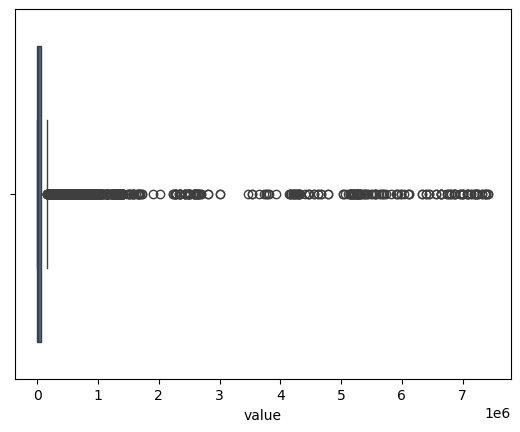

In [189]:
sns.boxplot(x = "value", data = df)
plt.show()

/tmp/ipykernel_4716/1714063872.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["value"])


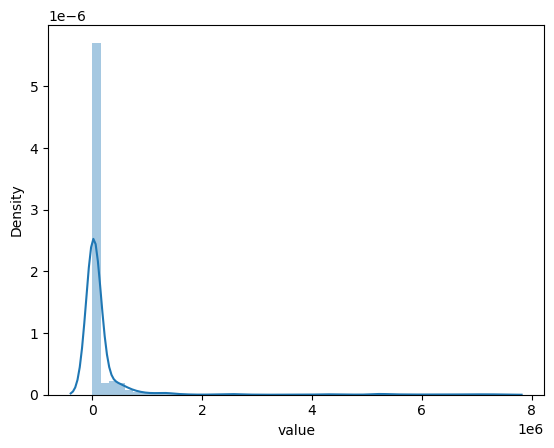

In [191]:
sns.distplot(df["value"])
plt.show()

In [193]:
q1 = df["value"].quantile(0.25)
q3 = df["value"].quantile(0.75)

In [195]:
iqr = q3-q1

In [197]:
min_range = q1 - (1.5 * iqr)
max_range = q3 + (1.5 * iqr)

In [199]:
df_no_outliers = df[(df["value"] >= min_range) & (df["value"] <= max_range)]

/tmp/ipykernel_4716/637931174.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_no_outliers["value"])


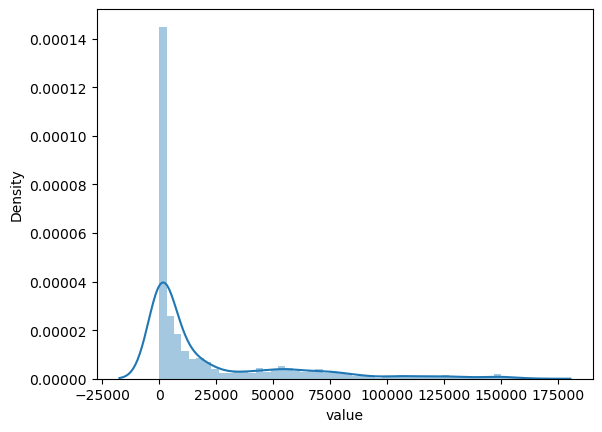

In [201]:
sns.distplot(df_no_outliers["value"])
plt.show()

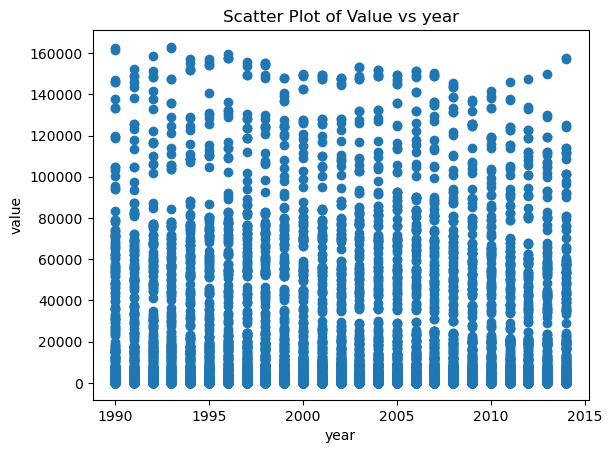

In [203]:
plt.scatter(df_no_outliers['year'], df_no_outliers['value'])
plt.xlabel('year')  # Label for x-axis
plt.ylabel('value')      # Label for y-axis
plt.title('Scatter Plot of Value vs year')  # Title of the plot
plt.show()

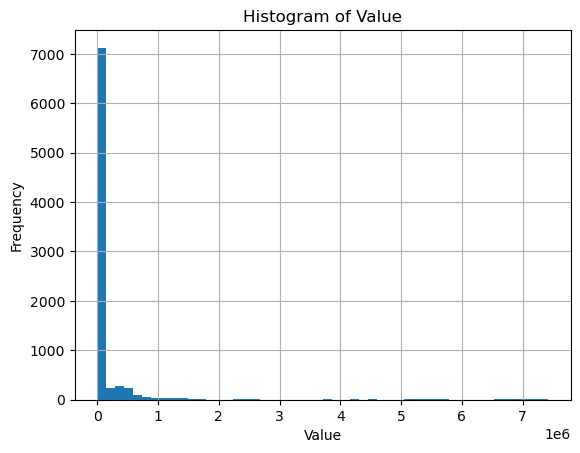

In [205]:
df['value'].hist(bins=50)
plt.title("Histogram of Value")
plt.xlabel("Value")
plt.ylabel("Frequency")
plt.show()

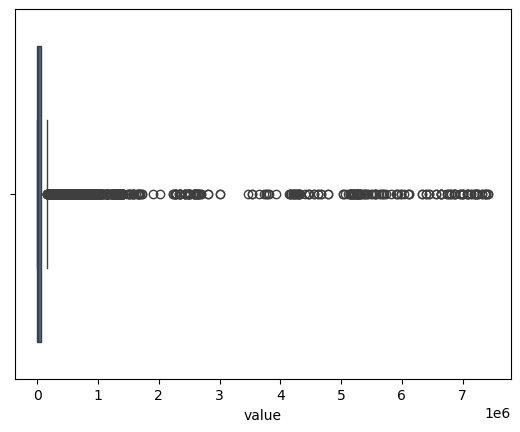

In [207]:
sns.boxplot(x = "value", data = df)
plt.show()

<Axes: xlabel='log_value'>

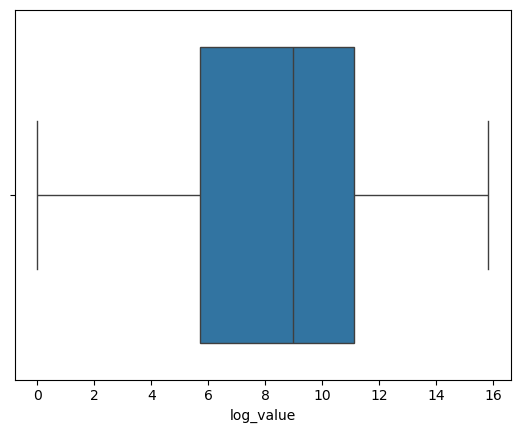

In [209]:
import numpy as np
df['log_value'] = np.log1p(df['value'])  # log1p handles 0 values
sns.boxplot(x=df['log_value'])

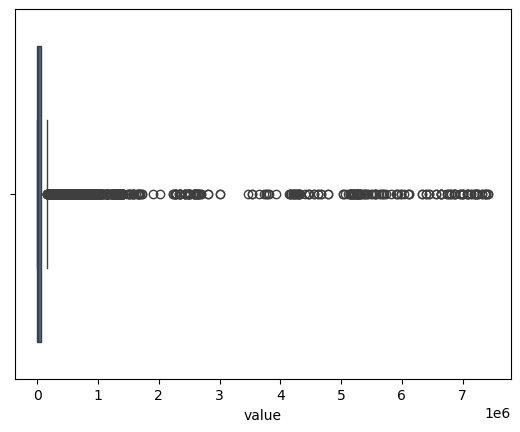

In [211]:
sns.boxplot(x = "value", data = df)
plt.show()

In [219]:
import folium
import geopandas as gpd
import pandas as pd

# Load your dataset
# co2_data = pd.read_csv('your_dataset.csv')  # Replace with your actual file path
co2_data = df

# Rename columns for clarity (optional)
co2_data.rename(columns={'country_or_area': 'country', 'value': 'co2_emissions'}, inplace=True)

# Load the world map shapefile
world = gpd.read_file('/home/divya/WonderLand/GHG_VISION/iitkp/ne_110m_admin_0_countries/ne_110m_admin_0_countries.shp')  # Replace with your shapefile path

In [219]:
import folium
import geopandas as gpd
import pandas as pd

# Load your dataset
# co2_data = pd.read_csv('your_dataset.csv')  # Replace with your actual file path
co2_data = df

# Rename columns for clarity (optional)
co2_data.rename(columns={'country_or_area': 'country', 'value': 'co2_emissions'}, inplace=True)

# Load the world map shapefile
world = gpd.read_file('/home/divya/WonderLand/GHG_VISION/iitkp/ne_110m_admin_0_countries/ne_110m_admin_0_countries.shp')  # Replace with your shapefile path

In [229]:
world.head()

,featurecla,scalerank,LABELRANK,SOVEREIGNT,SOV_A3,ADM0_DIF,LEVEL,TYPE,TLC,ADMIN,...,FCLASS_PL,FCLASS_GR,FCLASS_IT,FCLASS_NL,FCLASS_SE,FCLASS_BD,FCLASS_UA,geometry,country,co2_emissions
0,Admin-0 country,1,6,Fiji,FJI,0,2,Sovereign country,1,Fiji,...,None,None,None,None,None,None,None,"MULTIPOLYGON (((180 -16.06713, 180 -16.55522, ...",NaN,NaN
1,Admin-0 country,1,3,United Republic of Tanzania,TZA,0,2,Sovereign country,1,United Republic of Tanzania,...,None,None,None,None,None,None,None,"POLYGON ((33.90371 -0.95, 34.07262 -1.05982, 3...",NaN,NaN
2,Admin-0 country,1,7,Western Sahara,SAH,0,2,Indeterminate,1,Western Sahara,...,Unrecognized,None,None,Unrecognized,None,None,None,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948...",NaN,NaN
3,Admin-0 country,1,2,Canada,CAN,0,2,Sovereign country,1,Canada,...,None,None,None,None,None,None,None,"MULTIPOLYGON (((-122.84 49, -122.97421 49.0025...",Canada,5.300515e+07
4,Admin-0 country,1,2,United States of America,US1,1,2,Country,1,United States of America,...,None,None,None,None,None,None,None,"MULTIPOLYGON (((-122.84 49, -120 49, -117.0312...",United States of America,5.211098e+08


In [223]:
print(world.columns)

Index(['featurecla', 'scalerank', 'LABELRANK', 'SOVEREIGNT', 'SOV_A3',
       'ADM0_DIF', 'LEVEL', 'TYPE', 'TLC', 'ADMIN',
       ...
       'FCLASS_TR', 'FCLASS_ID', 'FCLASS_PL', 'FCLASS_GR', 'FCLASS_IT',
       'FCLASS_NL', 'FCLASS_SE', 'FCLASS_BD', 'FCLASS_UA', 'geometry'],
      dtype='object', length=169)


In [227]:

# Load your dataset
co2_data = df  # Replace with your actual file path

# Rename columns for clarity (optional)
co2_data.rename(columns={'country_or_area': 'country', 'value': 'co2_emissions'}, inplace=True)

# Load the world map shapefile
world = gpd.read_file('/home/divya/WonderLand/GHG_VISION/iitkp/ne_110m_admin_0_countries/ne_110m_admin_0_countries.shp')

# Print columns to verify the correct merge key
print(world.columns)

# Merge the CO2 data with the world map
world = world.merge(
    co2_data.groupby('country').agg({'co2_emissions': 'sum'}).reset_index(),
    how='left', left_on='ADMIN', right_on='country'
)

# Create a Folium map
m = folium.Map(location=[0, 0], zoom_start=2)

# Add CO2 emissions as a choropleth map
folium.Choropleth(
    geo_data=world.__geo_interface__,
    name='choropleth',
    data=world,
    columns=['ADMIN', 'co2_emissions'],
    key_on='feature.properties.ADMIN',
    fill_color='YlGnBu',
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name='CO2 Emissions (Gt)'
).add_to(m)

# Save the map
m.save('co2_emissions_map.html')
print("Map saved as 'co2_emissions_map.html'")


Index(['featurecla', 'scalerank', 'LABELRANK', 'SOVEREIGNT', 'SOV_A3',
       'ADM0_DIF', 'LEVEL', 'TYPE', 'TLC', 'ADMIN',
       ...
       'FCLASS_TR', 'FCLASS_ID', 'FCLASS_PL', 'FCLASS_GR', 'FCLASS_IT',
       'FCLASS_NL', 'FCLASS_SE', 'FCLASS_BD', 'FCLASS_UA', 'geometry'],
      dtype='object', length=169)
Map saved as 'co2_emissions_map.html'


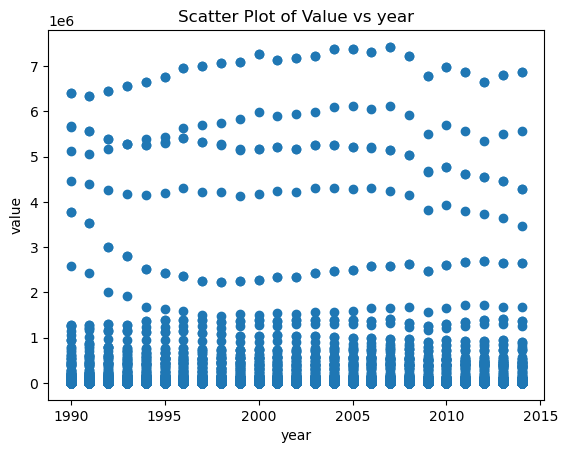

In [67]:
plt.scatter(df['year'], df['value'])
plt.xlabel('year')  # Label for x-axis
plt.ylabel('value')      # Label for y-axis
plt.title('Scatter Plot of Value vs year')  # Title of the plot
plt.show()

In [69]:
#outliers in the 'value' column using the Z-score method
from scipy import stats
z_scores = np.abs(stats.zscore(df['value']))
print(z_scores)

0       0.233278
1       0.237988
2       0.249863
3       0.246434
4       0.249538
          ...   
8401    0.254885
8402    0.254893
8403    0.254909
8404    0.254918
8405    0.255258
Name: value, Length: 8406, dtype: float64


In [71]:
# Replace outliers with the median value
df['value'] = np.where(z_scores > 3, df['value'].mean(), df['value'])

/tmp/ipykernel_4716/1714063872.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["value"])


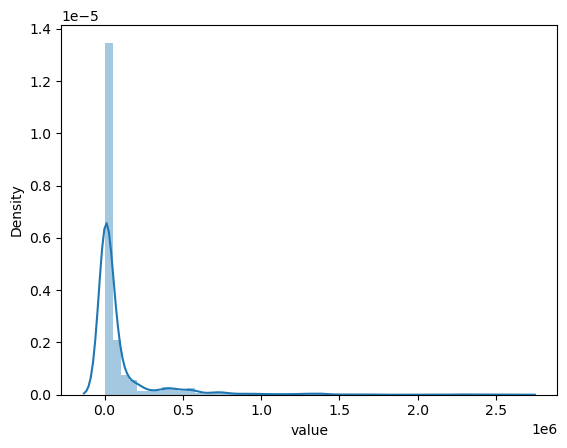

In [73]:
sns.distplot(df["value"])
plt.show()

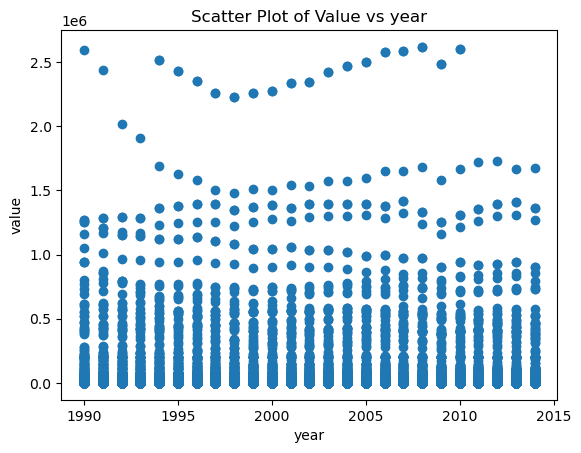

In [75]:
plt.scatter(df['year'], df['value'])
plt.xlabel('year')  # Label for x-axis
plt.ylabel('value')      # Label for y-axis
plt.title('Scatter Plot of Value vs year')  # Title of the plot
plt.show()

In [5]:
# Checking duplicate value
duplicates = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")

# # Removeing duplicate rows
# df.drop_duplicates(inplace=True)

Number of duplicate rows: 0


In [6]:
# Checking for inconsistent data in the 'category' column
print(df['category'].value_counts())

category
carbon_dioxide_co2_emissions_without_land_use_land_use_change_and_forestry_lulucf_in_kilotonne_co2_equivalent     1074
greenhouse_gas_ghgs_emissions_without_land_use_land_use_change_and_forestry_lulucf_in_kilotonne_co2_equivalent    1074
nitrous_oxide_n2o_emissions_without_land_use_land_use_change_and_forestry_lulucf_in_kilotonne_co2_equivalent      1074
methane_ch4_emissions_without_land_use_land_use_change_and_forestry_lulucf_in_kilotonne_co2_equivalent            1074
sulphur_hexafluoride_sf6_emissions_in_kilotonne_co2_equivalent                                                    1032
hydrofluorocarbons_hfcs_emissions_in_kilotonne_co2_equivalent                                                      975
greenhouse_gas_ghgs_emissions_including_indirect_co2_without_lulucf_in_kilotonne_co2_equivalent                    949
perfluorocarbons_pfcs_emissions_in_kilotonne_co2_equivalent                                                        831
nitrogen_trifluoride_nf3_emissions_in_k

In [7]:
# # Handling inconsistent data by replacing missing or unknown values with a suitable value (e.g., 'Unknown')
# df['category'].fillna('Unknown', inplace=True)

In [8]:
# Verifing  that the data has been preprocessed correctly
print(df.head())

  country_or_area  year          value  \
0       Australia  2014  393126.946994   
1       Australia  2013  396913.936530   
2       Australia  2012  406462.847704   
3       Australia  2011  403705.528314   
4       Australia  2010  406200.993184   

                                            category  
0  carbon_dioxide_co2_emissions_without_land_use_...  
1  carbon_dioxide_co2_emissions_without_land_use_...  
2  carbon_dioxide_co2_emissions_without_land_use_...  
3  carbon_dioxide_co2_emissions_without_land_use_...  
4  carbon_dioxide_co2_emissions_without_land_use_...  


In [ ]:
import pandas as pd
from geopy.geocoders import Nominatim

# Load your dataset
df = pd.read_csv('your_dataset.csv')

# Initialize the geocoder
geolocator = Nominatim(user_agent="geoapiExercises")

# Create empty lists to store lat and long values
latitudes = []
longitudes = []

# Loop through the country names and geocode them
for country in df['country_or_area']:
    location = geolocator.geocode(country)
    if location:
        latitudes.append(location.latitude)
        longitudes.append(location.longitude)
    else:
        latitudes.append(None)
        longitudes.append(None)

# Add the lat and long columns to the dataframe
df['latitude'] = latitudes
df['longitude'] = longitudes

# Save the updated dataset
df.to_csv('updated_dataset_with_latlong.csv', index=False)
